# Sales Channel Prediction:

In [7]:
# importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Reading the Dataset:
df = pd.read_csv('Saleschannel.csv')
print(df.shape)
df.head()

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
#Lets reset the index and drop unnecessary column:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
#checking the datatypes:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


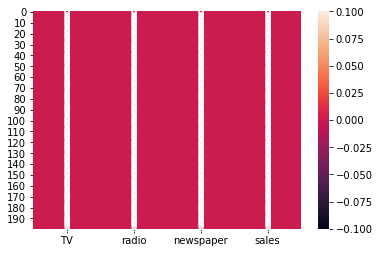

In [11]:
# Checking For null values
print(df.isnull().sum())
sns.heatmap(df.isnull(),annot=True)

In [12]:
#Doing Statistical Analysis by using Describe Function:
#Checking interquantile range.
#Checking mean median mode
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
#Exploratory Data Analysis
#Univarite Analysis
#Multivariate Analysis
#Bivariate Analysis
#Checking the impact of independent variable on dependant variable.

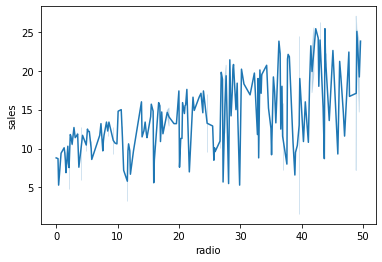

In [14]:
# checking the relation between radio and salex:
sns.lineplot(x='radio',y='sales',data=df)
plt.show()

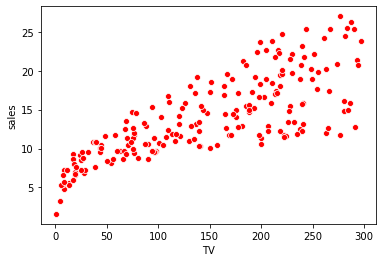

In [17]:
# checking the relation between TV and salex:
sns.scatterplot(x='TV',y='sales',data=df,color='red')
plt.show()

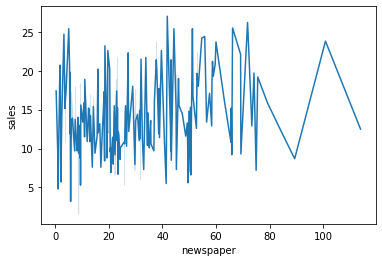

In [25]:
# checking the relation between newspaper and salex:
sns.lineplot(x='newspaper',y='sales',data=df)
plt.show()

In [26]:
#Checking the coerelation:
#show how the different features are corelated to each other 
#Their strength of relationship
#Their influence on target variable

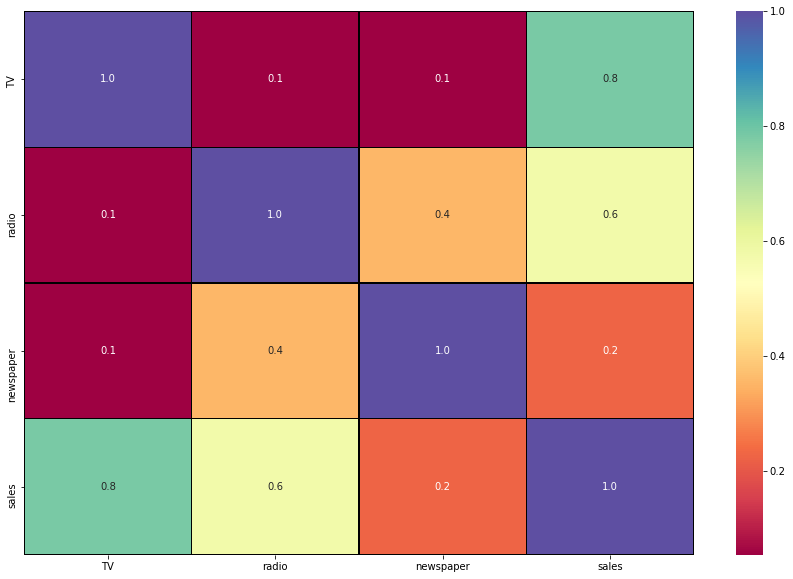

In [27]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [28]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [29]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [30]:
import scipy.stats as stat
import pylab

In [31]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

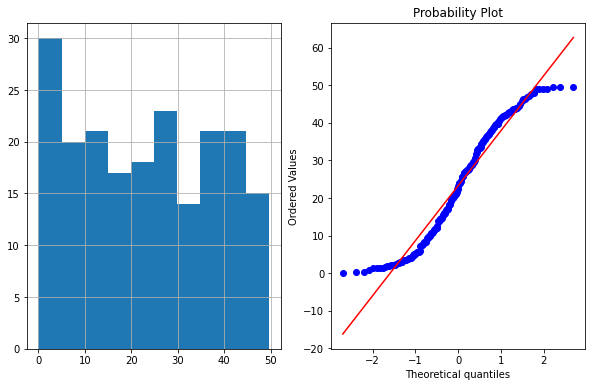

In [32]:
plot_data(df,'radio')

In [33]:
# We can clearly see data points are not been normally distributed.

In [34]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [35]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

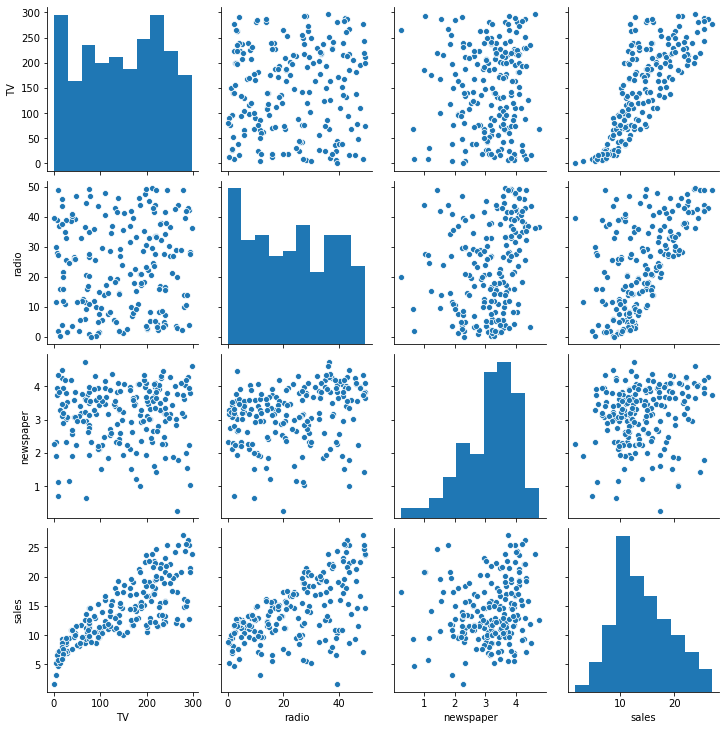

In [36]:
# using pairplot to check relationship between various features all together:
sns.pairplot(df)
plt.show()

In [37]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

In [38]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print(df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(200, 4)
(199, 4)


In [39]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop(columns = ['sales'])
y = df_final[['sales']]

In [40]:
#Lets check the shape of input and output values:
print(X.shape)
print(y.shape)

(199, 3)
(199, 1)


In [41]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [42]:
# Doing Prediction:

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r_state)
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42 is  0.8677924272802666
r2_score corresponding to random state:  43 is  0.9048262770819535
r2_score corresponding to random state:  44 is  0.857666949400977
r2_score corresponding to random state:  45 is  0.789384476609376
r2_score corresponding to random state:  46 is  0.870755370797444
r2_score corresponding to random state:  47 is  0.893544142431822
r2_score corresponding to random state:  48 is  0.863771629471993
r2_score corresponding to random state:  49 is  0.8130088614289002
r2_score corresponding to random state:  50 is  0.8464090280108074
r2_score corresponding to random state:  51 is  0.9073797001301336
r2_score corresponding to random state:  52 is  0.9024139483388713
r2_score corresponding to random state:  53 is  0.8843777037202283
r2_score corresponding to random state:  54 is  0.8369002978122061
r2_score corresponding to random state:  55 is  0.8302981595828364
r2_score corresponding to random state:  56 is  0.8791107891889827


In [44]:
#Lets do cross Validation and check the mean r2 score.
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=5,scoring="r2").mean()

0.8872005567864955

In [45]:
#Lets select the random state from above analysis:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [46]:
print('r2 score is ',r2_score(y_test,y_pred))
print('MSME Score is ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.94280827688424
MSME Score is  1.2069732201545373


In [47]:
#Lets save the Model for future analysis:
import joblib
joblib.dump(lr,'lr.obj')
lr_from_joblib = joblib.load('lr.obj')
lr_from_joblib.predict(X_test)

array([[15.28359817],
       [14.77599885],
       [10.17898281],
       [14.87094151],
       [23.7007292 ],
       [22.7983948 ],
       [20.3290194 ],
       [16.81286208],
       [20.70306754],
       [20.98825198],
       [21.32803804],
       [23.1052034 ],
       [16.29368366],
       [ 9.69904864],
       [12.90067976],
       [16.2922177 ],
       [20.6401233 ],
       [12.26959267],
       [ 9.15280541],
       [11.63161075],
       [18.1897933 ],
       [11.77695421],
       [11.49573174],
       [14.91403519],
       [ 9.19298415],
       [13.38544771],
       [ 5.39499934],
       [ 8.77482904],
       [16.83278145],
       [ 8.51795147],
       [11.98242235],
       [19.31801985],
       [20.84630695],
       [ 7.5585836 ],
       [13.51564722],
       [15.29966004],
       [16.52574505],
       [12.22919129],
       [ 9.97585888],
       [16.34804219]])